## 3주차 미션 소개 -  피처 엔지니어링(Feature Engineering)

* 피처 엔지니어링(Feature Engineering)은 머신러닝 모델을 훈련시키기 위해 입력 데이터로 사용되는 피처(또는 변수)들을 가공하거나 새로운 피처를 만들어내는 과정을 말합니다. 피처 엔지니어링은 머신러닝 성능을 향상시키고 모델의 일반화 성능을 향상시키는 데 핵심적인 역할을 합니다. 현실 세계의 데이터는 종종 불완전하고 노이즈가 많습니다. 결측값, 이상치, 오류 등이 있을 수 있습니다. 종속 변수와의 관계를 강화하고 모델이 더 나은 예측을 할 수 있도록 도와줍니다. 예를 들어, 특정 도메인 지식을 활용하여 새로운 피처를 생성하거나 기존 피처를 변형시켜 모델이 패턴을 더 잘 파악하도록 할 수 있습니다. 불필요한 피처를 제거하거나 피처를 효과적으로 변형함으로써 모델의 계산 효율성을 높일 수 있습니다. 이는 모델을 더 빠르게 훈련시키고 실행시킬 수 있습니다.

* 미션 데이터셋 소개

    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
    * 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
        * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
        * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
        * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
        * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 미션 수행을 위해 데이터셋을 로드합니다.
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [ ]:
# 결측치 데이터 삭제
df = df.dropna()

## 미션 1) - 수치형 변수를 범주형 변수로 만들기

* 월별 지불 금액을 그룹화하여 지불 금액 구간별 경향성을 분석할 수 있습니다. 이러한 수치형 데이터의 범주화는 수치형 데이터에 이상치가 있을 경우, 이를 구간화함으로써 이상치의 영향을 줄일 수 있습니다. 범주화된 데이터는 일반적으로 이해하기 쉽습니다. 그리고 모델이 특정 수치에 과도하게 적합되는 것을 방지할 수 있습니다. 수치형 데이터를 구간으로 나눔으로써 모델이 데이터의 일반적인 패턴을 학습하는 데 집중하도록 할 수 있습니다. 범주화된 데이터는 시각화 및 보고서 작성 시 직관적이고 명확한 정보 전달이 가능합니다. 데이터의 분포, 추세 등을 파악하기에 용이합니다. 데이터의 분포가 불균일할 때, 구간화를 통해 각 범주 내 데이터의 분포를 보다 균일하게 만들 수 있습니다. 위와 같은 이유로 수치형 변수를 범주화 하는 미션을 진행해 보겠습니다.

* 수치형 변수를 범주형 변수로 변환합니다.
* MonthlyCharges 를 4개의 구간으로 나눕니다. 구간을 나누는 기준은 시각화 내용을 바탕으로 정하며 기준에 대한 정답이 있지는 않습니다. 구간을 정한 기준을 설명으로 작성하고 구간을 나누는 코드를 작성해 주세요.

* 다음과 같이 원본과 구간을 나눈 데이터를 비교해 주세요. 기준이 정해져 있지 않으며 정답이 없으니 자율적으로 나눠 보세요.

| customerID   |   MonthlyCharges | monthlycharges_group   |
|:-------------|-----------------:|:-----------------------|
| 7590-VHVEG   |            29.85 | 0-30                   |
| 5575-GNVDE   |            56.95 | 30-70                  |
| 3668-QPYBK   |            53.85 | 30-70                  |
| 7795-CFOCW   |            42.3  | 30-70                  |
| 9237-HQITU   |            70.7  | 70-99                  |

<table>
    <tr>
        <td><img src="https://i.imgur.com/Tiub25Z.png" width="300"></td>
        <td><img src="https://i.imgur.com/7iGsGPB.png" width="300"></td>
    </tr>
</table>

### (1) 기본 데이터셋 – 수치형 변수들을 변환하지 않고 범주형 변수들을 라벨인코딩
- 앞으로 피처엔지니어링을 통해 생성된 새로운 피처들을 가지고 생성한 모델들과 성능을 비교해주기 위해 기본모델을 실행해줍니다.
- 미션3에서 모델들에 데이터를 넣어주었을 때 오류가 나지 않도록 범주형 변수에 라벨인코딩을 해주었습니다.

In [ ]:
# 전처리를 하지 않은 데이터프레임을 df_base로 지정

# 먼저 df_base에 df를 복사
df_base = df.copy()

# 범주형 변수명만 추출
category_cols = df_base.select_dtypes(exclude = 'number').columns

# 범주형 변수들을 리스트 형태로 변경
category_cols = category_cols.tolist()
category_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

> 라벨인코딩을 할 때 여러모델에 해당 데이터셋을 적용할 것을 생각해 타겟변수인 "Churn"도 같이 인코딩해주었습니다.

In [ ]:
# 범주형 변수에 대해 라벨인코딩
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# LabelEncoder 객체 생성
le_all = LabelEncoder()

# 라벨인코딩은 범주형 변수 하나씩만 이루어짐. 따라서, for문을 사용하여 타겟변수(Churn)를 제외한 범주형 변수에 대해 라벨인코딩 수행
for col in category_cols:
    df_base[col] = le_all.fit_transform(df_base[col])

df_base.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


기본 데이터셋을 이용해 만든 모델들의 정확도는 아래와 같습니다.
```
Random Forest 정확도: 0.7825
GradientBoosting 정확도: 0.7974
CatBoost 정확도: 0.7846
Voting 정확도: 0.7896
```

> 수치형 변수를 범주형 변수로 만들어주기 전, 범주형 변수들을 넣을 데이터셋인 df_NumtoCat에 (1)에서 만든 기본 데이터셋을 복사해줍니다.

In [ ]:
# df_base를 df_NumtoCat로 복사
df_NumtoCat = df_base.copy()

### (2) MonthlyCharges를 범주형 변수로 변환
- 문제에서 제시된 것처럼 범주형 변수를 4개의 범주로 된 새로운 변수 "MonthlyCharges_group"을 생성해주려 합니다.
- 지난 주에 한 미션에서 MonthlyCharges에 대해 히스토그램으로 시각화한 그래프를 보시면 이탈한 그룹과 그렇지 않은 그룹 사이에서 차이가 보입니다.

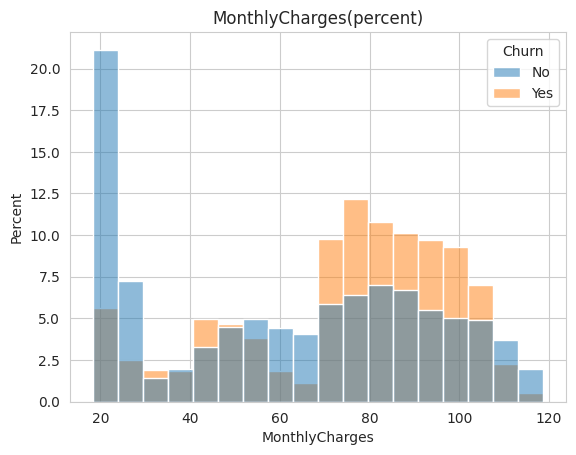

In [ ]:
# MonthlyCharges(percent) 시각화

sns.set_style("whitegrid") # 그래프 background
sns.histplot(data = df, x = 'MonthlyCharges', hue = "Churn",
             stat = 'percent', common_norm = False, bins = 18)
plt.title("MonthlyCharges(percent)")

plt.show()

> 이탈여부에 따른 히스토그램을 나타낼 때 두 그룹간의 비율이 No:Yes = 7:3으로 불균형을 보여 percent로 시각화 해주었습니다. 그래프를 보시면 구간별로 두 그룹간에 보이는 차이가 다릅니다. 두 그룹간의 보이는 비율의 차이의 정도는 0에서 30근처, 30에서 70근처, 70근처에서 100~105근처, 그 이후 구간입니다. 히스토그램에서 bin들의 경계값을 확인해봅니다.

In [ ]:
# MonthlyCharges에서 bin들의 경계 출력
mc_bins = np.histogram_bin_edges(df['MonthlyCharges'], bins= 18)
mc_bins

array([ 18.25      ,  23.83333333,  29.41666667,  35.        ,
        40.58333333,  46.16666667,  51.75      ,  57.33333333,
        62.91666667,  68.5       ,  74.08333333,  79.66666667,
        85.25      ,  90.83333333,  96.41666667, 102.        ,
       107.58333333, 113.16666667, 118.75      ])

> 경계값에 따라 MonthlyCharges를   
0에서 30미만, 30이상 ~ 69미만, 69이상 ~ 108미만, 108이상  
으로 4개의 범주로 나누어 4개의 범주로 생성한 피처를 MonthlyCharges_group에 저장합니다.

In [ ]:
# MonthlyCharges에 대한 범주형 피처 생성 - MonthlyCharges_group
df_NumtoCat.loc[df_NumtoCat['MonthlyCharges'] < 30, 'MonthlyCharges_group'] = '0-30'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 30) & (df_NumtoCat['MonthlyCharges'] < 69), 'MonthlyCharges_group'] = '30-69'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 69) & (df_NumtoCat['MonthlyCharges'] < 102) , 'MonthlyCharges_group'] = '69-102'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 102), 'MonthlyCharges_group'] = '102+'

df_NumtoCat[['MonthlyCharges', 'MonthlyCharges_group']].head()

,MonthlyCharges,MonthlyCharges_group
customerID,,
7590-VHVEG,29.85,0-30
5575-GNVDE,56.95,30-69
3668-QPYBK,53.85,30-69
7795-CFOCW,42.30,30-69
9237-HQITU,70.70,69-102


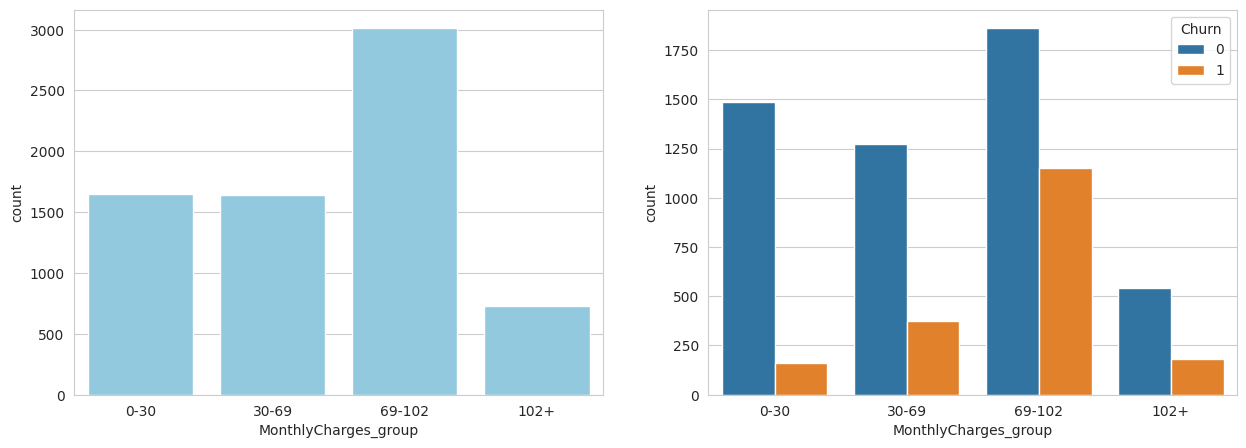

In [ ]:
## MonthlyCharges_group에 대한 countplots ##

# 전체 그래프 레이아웃 설정
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))   # 그래프개수, 크기
sns.set_style("whitegrid") # 그래프 background

# MonthlyCharges_group - 전체데이터에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'MonthlyCharges_group',color = "skyblue", ax = axes[0])

# MonthlyCharges_group - 이탈여부에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'MonthlyCharges_group', hue = "Churn", ax = axes[1])

plt.show()

> 왼쪽의 전체그룹 그래프에서 0-30, 30-69 범주가 비슷해보입니다. 오른쪽 그래프는 이탈여부에 따른 분포에 차이가 있어보입니다. 실제로 이렇게 모델을 생성하고 평가한 결과 오히려 성능이 떨어졌습니다. 전체데이터에 대해 범주마다 차이를 보이게 하기 위해 문제에서 제시한 것처럼 범주를 다시 나눕니다.  
0-30, 30-70, 70-99, 99+로 다시 범주를 나누어 줍니다.

In [ ]:
# MonthlyCharges에 대한 수정한 범주형 피처 생성 - MonthlyCharges_group
df_NumtoCat.loc[df_NumtoCat['MonthlyCharges'] < 30, 'MonthlyCharges_group'] = '0-30'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 30) & (df_NumtoCat['MonthlyCharges'] < 70), 'MonthlyCharges_group'] = '30-70'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 70) & (df_NumtoCat['MonthlyCharges'] < 99), 'MonthlyCharges_group'] = '70-99'
df_NumtoCat.loc[(df_NumtoCat['MonthlyCharges'] >= 99), 'MonthlyCharges_group'] = '99+'

df_NumtoCat[['MonthlyCharges', 'MonthlyCharges_group']].head()

,MonthlyCharges,MonthlyCharges_group
customerID,,
7590-VHVEG,29.85,0-30
5575-GNVDE,56.95,30-70
3668-QPYBK,53.85,30-70
7795-CFOCW,42.30,30-70
9237-HQITU,70.70,70-99


> 수정한 MonthlyCharges_group을 시각화하면 아래와 같습니다. 그룹마다 이탈비율의 차이를 보입니다.

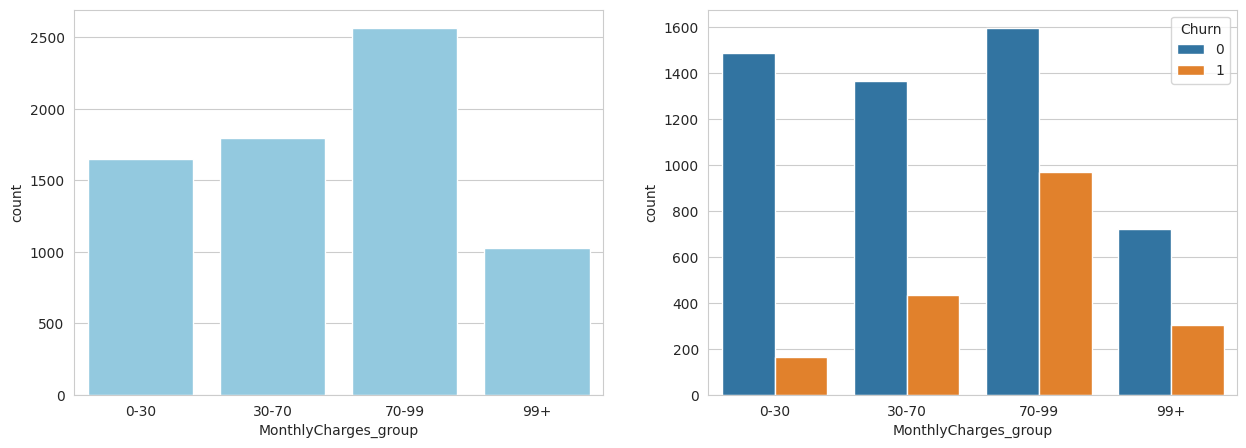

In [ ]:
## 수정한 MonthlyCharges_group에 대한 countplots ##

# 전체 그래프 레이아웃 설정
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))   # 그래프개수, 크기
sns.set_style("whitegrid") # 그래프 background

# MonthlyCharges_group - 전체데이터에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'MonthlyCharges_group',color = "skyblue", ax = axes[0])

# MonthlyCharges_group - 이탈여부에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'MonthlyCharges_group', hue = "Churn", ax = axes[1])

plt.show()

> MonthlyCharges_group사이에 보이는 차이가 일정하지 않습니다. 따라서 원핫인코딩을 해줍니다.

In [ ]:
# MonthlyCharges_group을 원핫인코딩
df_NumtoCat = pd.get_dummies(df_NumtoCat, columns = ["MonthlyCharges_group"])
df_NumtoCat.filter(like='MonthlyCharges_group').head(2)

,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+
customerID,,,,
7590-VHVEG,1,0,0,0
5575-GNVDE,0,1,0,0


> 원핫인코딩을 마친 MonthlyCharges_group의 피처들을 적용한 데이터셋에 대해 미션3에서 모델을 생성하고 평가한 결과는 다음과 같습니다.
```
Random Forest 정확도: 0.7889
GradientBoosting 정확도: 0.7903
CatBoost 정확도: 0.7790
Voting 정확도: 0.7896
```
필요한 범주화이므로 평가점수에 상관없이 그대로 진행해줍니다.

### (3)	Tenure를 범주형 변수로 변환
- 수치형 변수 Tenure에 대해 범주형 변수를 만들어주고 모델을 적합해봅니다.
- 평가점수가 올라가면 적용한 모델을 그대로 사용해 줍니다.

> 먼저 Tenure에 대해 시각화해줍니다.

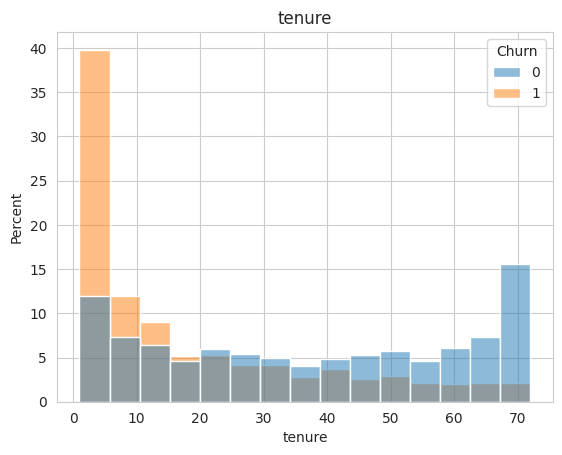

In [ ]:
# 가입기간(tenure)에 대한 고객의 이탈정보 시각화
sns.set_style("whitegrid")
sns.histplot(data = df_NumtoCat, x = 'tenure', hue = "Churn", stat = 'percent', common_norm = False)

plt.title("tenure")
plt.show()

In [ ]:
# 가입기간(tenure)에 대한 계급구간의 경계
tenure_bins = np.histogram_bin_edges(df_NumtoCat['tenure'], bins= 15)
tenure_bins

array([ 1.        ,  5.73333333, 10.46666667, 15.2       , 19.93333333,
       24.66666667, 29.4       , 34.13333333, 38.86666667, 43.6       ,
       48.33333333, 53.06666667, 57.8       , 62.53333333, 67.26666667,
       72.        ])

> 실제로 가입기간은 정수형입니다. 따라서 경계구간을 반올림하여 정수로 바꾸어주었습니다.

In [ ]:
# tenure의 데이터와 타입확인
display(df_NumtoCat['tenure'].head(2))
type(df_NumtoCat['tenure'])

customerID
7590-VHVEG     1
5575-GNVDE    34
Name: tenure, dtype: int64

pandas.core.series.Series

> 가입기간이 그래프에서 첫번째 구간인 6개월미만에서 이탈고객의 비율이 40%가까이 압도적으로 높게 나와 좁은 구간이지만 범주를 따로 만들었고, 그 뒤로 6개월 이상부터 20개월 미만, 20개월 이상부터 44개월 미만, 44개월 이상 고객으로 나누어 주었습니다.

In [ ]:
# tenure에 대한 범주형 변수 tenure_group 생성
df_NumtoCat.loc[df_NumtoCat['tenure'] < 6, 'tenure_group'] = "0-6"
df_NumtoCat.loc[(df_NumtoCat['tenure'] >= 6) & (df_NumtoCat['tenure'] < 20), 'tenure_group'] = "6-20"
df_NumtoCat.loc[(df_NumtoCat['tenure'] >= 20) & (df_NumtoCat['tenure'] < 44), 'tenure_group'] = "20-44"
df_NumtoCat.loc[df_NumtoCat['tenure'] >= 44, 'tenure_group'] = "44+"
df_NumtoCat[['tenure', 'tenure_group']].head()

,tenure,tenure_group
customerID,,
7590-VHVEG,1,0-6
5575-GNVDE,34,20-44
3668-QPYBK,2,0-6
7795-CFOCW,45,44+
9237-HQITU,2,0-6


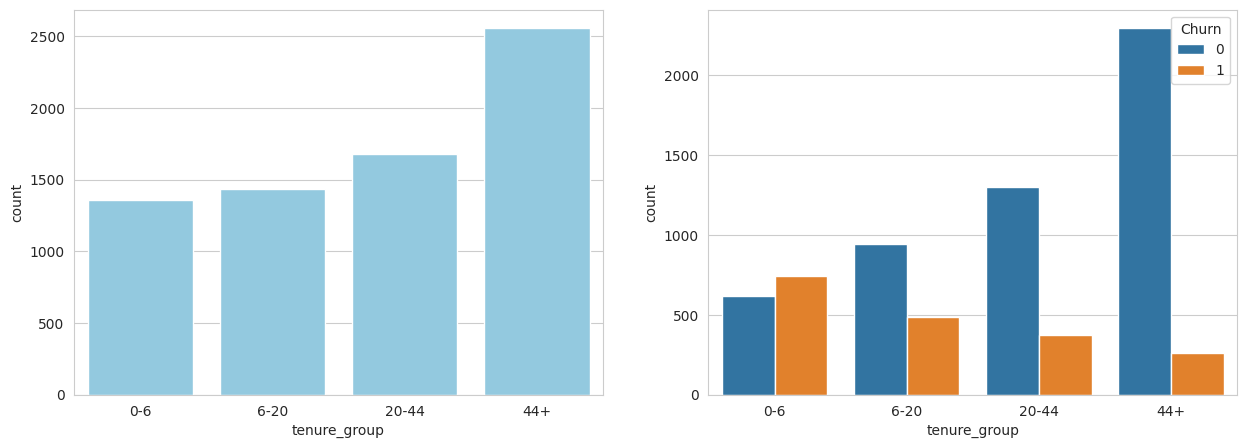

In [ ]:
## tenure_group에 대한 countplots ##

# 전체 그래프 레이아웃 설정
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))   # 그래프개수, 크기
sns.set_style("whitegrid") # 그래프 background

# tenure_group  - 전체데이터에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'tenure_group',color = "skyblue", ax = axes[0],
              order = ['0-6', '6-20', '20-44', '44+'])

# tenure_group  - 이탈여부에 대해 시각화
sns.countplot(data = df_NumtoCat, x = 'tenure_group', hue = "Churn", ax = axes[1],
              order = ['0-6', '6-20', '20-44', '44+'])

plt.show()

> 왼쪽 그래프에서보면, 전체데이터에 대해 범주마다 차이를 보이고, 오른쪽 그래프에서도 이탈여부에 따른 분포의 차이가 보입니다. tenure_group에 대해 원핫인코딩을 해줍니다.

In [ ]:
# tenure_group을 원핫인코딩
df_NumtoCat = pd.get_dummies(df_NumtoCat, columns = ["tenure_group"])
df_NumtoCat.filter(like='tenure_group').head(2)

,tenure_group_0-6,tenure_group_20-44,tenure_group_44+,tenure_group_6-20
customerID,,,,
7590-VHVEG,1,0,0,0
5575-GNVDE,0,1,0,0


> 해당 데이터셋으로 미션3에서 모델을 생성한 뒤 평가하면 아래와 같습니다.
```
Random Forest 정확도: 0.7775
GradientBoosting 정확도: 0.7882
CatBoost 정확도: 0.7854
Voting 정확도: 0.7868
```
> 오히려 정확도가 떨어졌으므로, tenure는 수치형 변수로 사용해줍니다.

In [ ]:
# tenure_group과 관련된 피처 삭제
tg_cols = df_NumtoCat.filter(like='tenure_group').columns
df_NumtoCat = df_NumtoCat.drop(tg_cols, axis = 1)
display(df_NumtoCat.head(2))
display(df_NumtoCat.columns)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,...,0,1,2,29.85,29.85,0,1,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,...,1,0,3,56.95,1889.50,0,0,1,0,0


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_group_0-30',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_70-99',
       'MonthlyCharges_group_99+'],
      dtype='object')

### (4) 범주화 된 MonthlyCharges, tenure변수와 TotalCharges와의 상관관계 비교
📊 2주차 EDA 미션을 생각해보면, 수치형 변수간의 상관계수를 구했을 때,TotalCharges(총 지불요금)는 tenure(가입기간)와 MonthlyCharges(월별요금)과의 상관관계가 각각 0.89와 0.64로 높았습니다.
- TotalCharges의 삭제여부에 따라 모델성능이 높아지는지 확인해봅니다.

In [ ]:
# TotalCharges 피처 삭제
df_NumtoCat = df_NumtoCat.drop("TotalCharges", axis = 1)
display(df_NumtoCat.head(2))
display(df_NumtoCat.columns)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,0,1,0,0,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,0,0,1,0,0


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'MonthlyCharges_group_0-30',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_70-99',
       'MonthlyCharges_group_99+'],
      dtype='object')

> TotalCharges 삭제 후 모델 성능 평가결과는 아래와 같습니다.
```
Random Forest 정확도: 0.7868
GradientBoosting 정확도: 0.7910
CatBoost 정확도: 0.7868
Voting 정확도: 0.7896
```
(1)과 비교했을 때 GradientBoost와 CatBoost의 성능이 떨어졌지만, (2),(3)과 비교해서도 성능이 올라갔음을 확인할 수 있습니다. 이 데이터셋을 미션1에서 수치형 변수에 행한 피처엔지니어링을 미션2의 데이터셋에서도 적용해 줍니다.

### (5) 미션1에서 수치형 변수에 적용한 피처엔지니어링을 적용한 데이터셋을 df_m1에 저장
- 미션2에서 수치형 변수에 피처엔지니어링을 한 데이터를 사용하기 위해 미션1에서 변환한 데이터셋을 저장합니다.
- SeniorCitizen은 범주형 변수로 취급해 미션2에서 원핫인코딩을 수행합니다.

In [ ]:
# MonthlyCharge_group과 관련된 피처 추출
mcg_cols = df_NumtoCat.filter(like='MonthlyCharges_group').columns

# df_m1에 원본데이터 복사
df_m1 = df.copy()

# 타겟변수 Churn을 수치형으로 변경
df_m1['Churn'] = (df_m1['Churn'] == "Yes").astype(int)

# df_m1에 MonthlyCharge_group과 관련된 피처 생성
df_m1[mcg_cols] = df_NumtoCat[mcg_cols]

# TotalCharges 삭제
df_m1 = df_m1.drop('TotalCharges', axis = 1)
display(df_m1.head(2))
display(df_m1.columns)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,0,1,0,0,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,0,0,1,0,0


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'MonthlyCharges_group_0-30',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_70-99',
       'MonthlyCharges_group_99+'],
      dtype='object')

## 미션 2) - One-Hot-Encoding 하기

* One-Hot Encoding은 범주형 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 기술 중 하나입니다. One-Hot Encoding을 사용하면 각 범주 간의 거리가 동일하게 유지됩니다. 즉, 범주 간의 유사성을 측정할 때 각 범주가 동일한 거리로 취급되므로 모델이 범주 간의 관계를 더 정확하게 학습할 수 있습니다. One-Hot Encoding은 범주의 수에 따라 적절한 차원을 생성하므로 데이터가 새로운 범주로 확장되거나 변할 때 모델이 쉽게 일반화될 수 있습니다. 각 범주가 독립된 차원으로 표현되므로, 모델의 예측이나 특성 중요도를 해석할 때 각 범주에 대한 기여를 명확하게 파악할 수 있습니다. 라벨 인코딩과 같은 다른 방법들이 범주 간의 임의의 순서를 생성할 수 있는 반면, One-hot encoding은 이러한 문제를 방지하고 모델이 데이터를 오해하는 것을 막습니다. 하지만, One-hot encoding은 범주의 수가 매우 많을 때 차원의 저주(curse of dimensionality)를 초래하거나, 데이터가 희소해질 수 있으므로 적용 시 이러한 점을 고려해야 합니다. 다음의 예시처럼 데이터를 One-Hot-Encoding 해주세요.

<img src="https://i.imgur.com/9Njm4aN.png">

| customerID   |   SeniorCitizen |   tenure |   TotalCharges |   gender_Female |   gender_Male |   Partner_No |   Partner_Yes |   Dependents_No |   Dependents_Yes |   PhoneService_No |
|:-------------|----------------:|---------:|---------------:|----------------:|--------------:|-------------:|--------------:|----------------:|-----------------:|------------------:|
| 7590-VHVEG   |               0 |        1 |          29.85 |               1 |             0 |            0 |             1 |               1 |                0 |                 1 |
| 5575-GNVDE   |               0 |       34 |        1889.5  |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 3668-QPYBK   |               0 |        2 |         108.15 |               0 |             1 |            1 |             0 |               1 |                0 |                 0 |
| 7795-CFOCW   |               0 |       45 |        1840.75 |               0 |             1 |            1 |             0 |               1 |                0 |                 1 |
| 9237-HQITU   |               0 |        2 |         151.65 |               1 |             0 |            1 |             0 |               1 |                0 |                 0 |


### (1)	모든 범주형 변수에 원핫인코딩 적용
- 데이터에서 주어진 모든 범주형 변수에 원핫인코딩을 적용합니다.
- 여기서 만들어진 데이터셋을 이용해 이루어진 모델 평가는 뒤에서 적용할 피처엔지니어링의 효과와 비교하기 위해 사용됩니다.

> 먼저 원핫인코딩에 적용할 범주형 변수명을 추출합니다.


In [ ]:
# 범주형 변수명 추출
category_cols = df.select_dtypes(exclude = 'number').columns
category_cols = category_cols.tolist()

# SeniorCitizen을 범주형 변수에 추가
category_cols.append('SeniorCitizen')

# 타겟변수인 Churn은 원핫인코딩에서 제외
category_cols.remove('Churn')

category_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [ ]:
# 모든 범주형 변수에 대해 원핫인코딩한 데이터를 저장할 데이터프레임 df_ohe 생성
df_ohe = df_m1.copy()

# 범주형 변수에 대해 원핫인코딩
df_ohe = pd.get_dummies(df_ohe, columns = category_cols)

# 데이터 및 피처명 확인
display(df_ohe.head(2))
df_ohe.columns

,tenure,MonthlyCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+,gender_Female,gender_Male,Partner_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
5575-GNVDE,34,56.95,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0


Index(['tenure', 'MonthlyCharges', 'Churn', 'MonthlyCharges_group_0-30',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_70-99',
       'MonthlyCharges_group_99+', 'gender_Female', 'gender_Male',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       

> 해당 데이터셋을 이용해 만든 모델의 성능 평가는 아래와 같습니다.
```
Random Forest 정확도: 0.7861
GradientBoosting 정확도: 0.7967
CatBoost 정확도: 0.7825
Voting 정확도: 0.7925
```
> GradientBoosting모델 외에 다른 모델에서 정확도가 떨어졌습니다. 이번에는 EDA에서 중요하다고 여긴 범주형 변수만 원핫인코딩을 합니다.

### (2)	EDA에서 중요하다고 여긴 범주형 변수만 원핫인코딩
📊 2주차 미션에서 EDA시각화를 통해 중요하다고 여긴 범주형 변수  
['Partner', 'Dependents', 'OnlineSecurity', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'SeniorCitizen','Contract', 'PaperlessBilling', 'PaymentMethod']들에게만 원핫인코딩을 적용해 모델을 생성합니다.

In [ ]:
# 중요한 범주형 변수에 대해 원핫인코딩한 데이터를 저장할 데이터프레임 df_ohe
df_ohe = df_m1.copy()

# 중요하지 않은 범주형 변수 삭제
unimp_cols = ["gender", "PhoneService", "MultipleLines", "StreamingMovies", "StreamingTV"]
df_ohe = df_ohe.drop(labels = unimp_cols , axis = 1)

# 중요한 범주형 변수명 추출
imp_category_cols = category_cols.copy()
for col in unimp_cols:
    imp_category_cols.remove(col)

display(imp_category_cols)
print("\n\n")

# 중요한 변수에 대해 원핫인코딩
df_ohe = pd.get_dummies(df_ohe, columns = imp_category_cols)

# 데이터 및 피처명 확인
display(df_ohe.head(2))
df_ohe.columns

['Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

,tenure,MonthlyCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_30-70,MonthlyCharges_group_70-99,MonthlyCharges_group_99+,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_0,SeniorCitizen_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
5575-GNVDE,34,56.95,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0


Index(['tenure', 'MonthlyCharges', 'Churn', 'MonthlyCharges_group_0-30',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_70-99',
       'MonthlyCharges_group_99+', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorC

> 해당 데이터셋을 이용해 모델을 생성하고 성능을 평가한 결과는 아래와 같습니다.
```
Random Forest 정확도: 0.7896
GradientBoosting 정확도: 0.7967
CatBoost 정확도: 0.7896
Voting 정확도: 0.7932
```
> (1)과 비교해 GradientBoosting에 대해서만 그대로이고 나머지 모델에 대해서는 성능향상이 이뤄졌습니다. 이 데이터셋으로 진행합니다.

### (3)	Churn과 중요한 범주형 변수들 간의 상관관계 비교
📊 2주차 미션에서는 범주형 변수들의 타입이 object라서 상관관계를 나타내기 어려웠습니다. 이제 범주형 변수들을 원핫인코딩해서 수치형 변수로 변환되었으므로, 상관관계를 비교해줍니다.

In [ ]:
# Churn과 상관계수의 절댓값이 높은 순으로 저장 및 출력
churn_corr = abs(df_ohe.corr()['Churn']).sort_values(ascending = False).round(3)
churn_corr

Churn                                      1.000
Contract_Month-to-month                    0.405
tenure                                     0.354
OnlineSecurity_No                          0.342
TechSupport_No                             0.337
InternetService_Fiber optic                0.307
Contract_Two year                          0.302
PaymentMethod_Electronic check             0.301
OnlineBackup_No                            0.268
DeviceProtection_No                        0.252
TechSupport_No internet service            0.228
DeviceProtection_No internet service       0.228
OnlineSecurity_No internet service         0.228
OnlineBackup_No internet service           0.228
InternetService_No                         0.228
MonthlyCharges_group_0-30                  0.210
MonthlyCharges                             0.193
MonthlyCharges_group_70-99                 0.192
PaperlessBilling_Yes                       0.191
PaperlessBilling_No                        0.191
Contract_One year   

### (4)	3에서 원핫인코딩으로 생성한 변수들 중에서 상관관계가 높은 변수만 적용
- Churn과의 상관계수의 절댓값이 0.15보다 낮은 변수들을 삭제한 데이터셋을 이용해 모델을 생성하고 평가해 줍니다.


In [ ]:
# 상대적으로 상관관계가 낮은 변수추출
churn_corr_low = churn_corr[(abs(churn_corr) < 0.15)]
display(churn_corr_low)

# churn과 상관관계가 낮은 변수명 추출
low_corr = churn_corr_low.index
display(low_corr)

PaymentMethod_Credit card (automatic)      0.135
InternetService_DSL                        0.124
PaymentMethod_Bank transfer (automatic)    0.118
PaymentMethod_Mailed check                 0.091
OnlineBackup_Yes                           0.082
DeviceProtection_Yes                       0.066
MonthlyCharges_group_30-70                 0.033
MonthlyCharges_group_99+                   0.030
Name: Churn, dtype: float64

Index(['PaymentMethod_Credit card (automatic)', 'InternetService_DSL',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Mailed check',
       'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'MonthlyCharges_group_30-70', 'MonthlyCharges_group_99+'],
      dtype='object')

> 추출한 변수들과 수치형 변수들로 데이터셋을 구성해 모델을 생성하고 성능을 평가해줍니다.

In [ ]:
# (2)에서 원핫인코딩한 데이터에서 위에서 추출한 변수만 남겨줍니다.

# Churn과 상관관계가 낮은 변수 삭제
df_ohe = df_ohe.drop(low_corr, axis = 1)
df_ohe.head(2)

,tenure,MonthlyCharges,Churn,MonthlyCharges_group_0-30,MonthlyCharges_group_70-99,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_Fiber optic,...,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Electronic check,SeniorCitizen_0,SeniorCitizen_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,1,1,1,0
5575-GNVDE,34,56.95,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0


> 해당 데이터셋을 이용해 모델을 생성하고 평가해주면 결과는 다음과 같습니다.
```
Random Forest 정확도: 0.7910
GradientBoosting 정확도: 0.8017
CatBoost 정확도: 0.7910
Voting 정확도: 0.7974
```
> (2)와 비교해 모든 모델에서 성능이 향상했음을 확인할 수 있습니다.

## 미션 3) - 여러 피처 엔지니어링 기법을 적용하고 통신사 고객 이탈여부에 대한 모델의 성능을 Accuracy로 평가해 주세요.

* 이 미션은 데이터 전처리와 피처 엔지니어링의 중요성을 이해하고, 실제 비즈니스 문제에 적용할 수 있는 머신러닝 모델을 개발하는 데 중점을 둡니다. 통신사 고객 데이터를 활용하여 고객의 이탈 여부를 예측하는 머신러닝 모델을 개발하고, 여러 피처 엔지니어링 기법을 적용하여 모델의 정확도(Accuracy)를 높여보세요. 고객 이탈 여부 예측은 통신사에 있어 중요한 비즈니스 문제로, 고객 유지 전략 수립에 큰 영향을 미칩니다.

* 피처엔지니어링을 진행하고 모델의 성능을 평가합니다.
* 모델은 트리계열 모델 외 다른 모델을 사용해도 됩니다.


### (1) 학습데이터와 예측데이터 분할
- 학습과 예측에 사용할 데이터를 X, 우리의 관심 데이터를 y에 저장한 뒤
- 학습데이터(train)와 예측 데이터로 나누어 주었습니다.

In [ ]:
# # X,y 데이터 분할
# X = df
# y = df["Churn"]

# 기본모델(미션1) - X,y 데이터 분할
# X = df_base.drop("Churn", axis = 1)
# y = df_base["Churn"]

# MonthlyCharges_group -> 원핫인코딩(미션1) - X,y 데이터 분할
# X = df_NumtoCat.drop(["Churn", "MonthlyCharges"], axis = 1)
# y = df_NumtoCat["Churn"]

# tenure_group -> 원핫인코딩(미션1) - X,y 데이터 분할
# X = df_NumtoCat.drop(["Churn", "MonthlyCharges", "tenure"], axis = 1)
# y = df_NumtoCat["Churn"]

# TotalCharges 삭제(미션1) - X,y 데이터 분할
# X = df_NumtoCat.drop(["Churn", "MonthlyCharges"], axis = 1)
# y = df_NumtoCat["Churn"]

# 모든 범주형 변수에 대해 원핫인코딩 실행(미션2) - X,y 데이터 분할
# X = df_ohe.drop(["Churn", "MonthlyCharges"], axis = 1)
# y = df_ohe["Churn"]

# 중요한 범주형 변수에 대해 원핫인코딩 실행(미션2) - X,y 데이터 분할
# X = df_ohe.drop(["Churn", "MonthlyCharges"], axis = 1)
# y = df_ohe["Churn"]

# 중요한 범주형 변수 원핫인코딩 실행 후 새롭게 생성된 변수들 중에서 상관관계가 높은 변수들만 남김(미션2) - X,y 데이터 분할
X = df_ohe.drop(["Churn", "MonthlyCharges"], axis = 1)
y = df_ohe["Churn"]

> X,y로 분할이 잘 이루어졌는지 확인해줍니다.

In [ ]:
# X,y 데이터 미리보기
display(X.head(2))
display(X.columns)
display(y.head(2))

,tenure,MonthlyCharges_group_0-30,MonthlyCharges_group_70-99,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,...,TechSupport_No internet service,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Electronic check,SeniorCitizen_0,SeniorCitizen_1
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,1,0,0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,1,1,0
5575-GNVDE,34,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


Index(['tenure', 'MonthlyCharges_group_0-30', 'MonthlyCharges_group_70-99',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'SeniorCitizen_0', 'SeniorCitizen_1'],
      dtype='object')

customerID
7590-VHVEG    0
5575-GNVDE    0
Name: Churn, dtype: int64

> 학습데이터와 예측데이터를 나누어줍니다.

In [ ]:
# 학습 데이터와 예측 데이터로 나누기
# 고객이탈(Churn)비율이 실제와 같게 층화(stratify)해줌
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

> RandomForest, GradientBoosting, CatBoost 그리고 이 세 개의 모델을 결합해 voting하여 모델을 생성하고 예측했습니다.

### (2) 모델 생성과 예측1 - RandomForest
- 가장 먼저 적용해 준 데이터셋은 RandomForest입니다. 파라미터는 1주에 실행한 미션에서 결정트리에 있는 파라미터를 적용해주고 의사결정나무의 개수를 n_estimator = 100으로 해주었습니다.

In [ ]:
##  RandomForest ##
from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 생성
rf_model = RandomForestClassifier(
    n_estimators=100,              # 의사결정나무의 개수
    criterion='gini',              # 의사 결정 트리의 분할 기준 (필요에 따라 'entropy'로 변경 가능)
    max_depth=10,                  # 트리의 최대 깊이
    min_samples_split=4,           # 내부 노드를 분할하기 위한 최소 샘플 수
    min_samples_leaf=2,            # 리프 노드에 있어야 하는 최소 샘플 수
    max_leaf_nodes=10,             # 생성될 최대 리프 노드 수
    random_state=37                # 재현성을 위한 난수 생성 상태
)

# 훈련 데이터로 RandomForest 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
rf_preds = rf_model.predict(X_test)


### (2) 모델 생성과 예측2 - GradientBoosting
- 다음으로는 GradientBoosting모델입니다. 매번 같은 결과가 나오도록 random_state만 설정해주었습니다.

In [ ]:
## GradientBoosting ##
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoosting 모델 생성
gb_model = GradientBoostingClassifier(random_state = 37)

# 훈련 데이터로 GradientBoosting 모델 학습
gb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
gb_preds = gb_model.predict(X_test)

### (2) 모델 생성과 예측3 - CatBoost
- - 다음으로는 CatBoost모델입니다. 매번 같은 결과가 나오도록 random_state만 설정해주었습니다.

In [ ]:
## CatBoost ##

# CatBoost 라이브러리 설치
# !pip install catboost

from catboost import CatBoostClassifier

# CatBoost 모델 생성
cb_model = CatBoostClassifier(random_state=37, verbose=0)  # CatBoost의 경우 verbose를 0으로 설정하여 출력 억제

# 훈련 데이터로 CatBoost 모델 학습
cb_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
cb_preds = cb_model.predict(X_test)

### (2) 모델 생성과 예측4 -Voting
- 마지막으로 위의 3개의 모델을 이용해 Voting을 해주었습니다. voting 방식은 확률적으로 계산하는 soft보다는 다수결 방식인 hard가 성능이 더 잘나와 hard를 사용해주었습니다.

In [ ]:
## Voting ##
from sklearn.ensemble import VotingClassifier

# (2)에서 사용한 모델들로 Voting
voting_model = VotingClassifier(estimators=[('rf_model', rf_model),
                                            ('gb_model', gb_model),
                                             ('cb_model', cb_model)],
                                voting='hard')   # voting = 'hard' : 다수결


# 훈련 데이터로 Voting 적용
voting_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
voting_preds = voting_model.predict(X_test)

### (3) 모델 평가 - 정확도 비교
- (2)에서 생성한 4개의 모델의 정확도를 비교했습니다.

In [ ]:
# 정확도 구하기
from sklearn.metrics import accuracy_score

# RandomForest 정확도
rf_accuracy = accuracy_score(y_test, rf_preds)

# GradientBoosting 정확도
gb_accuracy = accuracy_score(y_test, gb_preds)

# CatBoost 정확도
cb_accuracy = accuracy_score(y_test, cb_preds)

# Voting 정확도
voting_accuracy = accuracy_score(y_test, voting_preds)

# 위에서 구한 정확도 출력
print(f"Random Forest 정확도: {rf_accuracy:.4f}")
print(f"GradientBoosting 정확도: {gb_accuracy:.4f}")
print(f"CatBoost 정확도: {cb_accuracy:.4f}")
print(f"Voting 정확도: {voting_accuracy:.4f}")

Random Forest 정확도: 0.7910
GradientBoosting 정확도: 0.8017
CatBoost 정확도: 0.7910
Voting 정확도: 0.7974


#### **데이터셋마다 정확도 비교**
- 위에서 실행한 피처엔지니어링마다 모델의 정확도를 정리해두었습니다. 보시다시피 데이터셋에 피처엔지니어링을 실시한다고 해서 모든 모델에 대해 동시에 성능이 올라가거나 혹은 모든 모델에 대해 성능이 내려가지는 않습니다. 어떤 모델에 대해서는 성능이 올라가거나 다른 모델에서는 그대로이고 또 다른 모델에서는 오히려 성능이 내려가기도 합니다. 이 부분에 대해서는 조금 더 공부해보아야 할 것 같습니다.


1. 기본모델(미션1)
```
Random Forest 정확도: 0.7825
GradientBoosting 정확도: 0.7974
CatBoost 정확도: 0.7846
Voting 정확도: 0.7896
```
2. MonthlyCharges_group(원핫인코딩, 미션1)
```
Random Forest 정확도: 0.7889
GradientBoosting 정확도: 0.7903
CatBoost 정확도: 0.7790
Voting 정확도: 0.7896
```
3. tenure_group(원핫인코딩, 미션1)
```
Random Forest 정확도: 0.7775
GradientBoosting 정확도: 0.7882
CatBoost 정확도: 0.7854
Voting 정확도: 0.7868
```
4. TotalCharges 삭제(미션1)
```
Random Forest 정확도: 0.7868
GradientBoosting 정확도: 0.7910
CatBoost 정확도: 0.7868
Voting 정확도: 0.7896
```
5. 모든 범주형 변수에 대해 원핫인코딩(미션2)
```
Random Forest 정확도: 0.7861
GradientBoosting 정확도: 0.7967
CatBoost 정확도: 0.7825
Voting 정확도: 0.7925
```

6. 중요한 범주형 변수에 대해 원핫인코딩(미션2)
```
Random Forest 정확도: 0.7896
GradientBoosting 정확도: 0.7967
CatBoost 정확도: 0.7896
Voting 정확도: 0.7932
```
7. Churn과 상관관계가 높은 변수(절댓값이 0.15이상)에 대해 원핫인코딩(미션2)
```
Random Forest 정확도: 0.7910
GradientBoosting 정확도: 0.8017
CatBoost 정확도: 0.7910
Voting 정확도: 0.7974
```